<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 94.5 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 170.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 115.8 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=12fc996f45be13f8715c5bea305a44f754bfae76facd8aacf36374e5a3ec9303
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_x86_64.whl size=303891 sha256=741a6093bb433a7a685fbe18893a9eb0f5eb1c71e67af6f62fd541fbbb6e0c3d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/e2/48

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [42]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [43]:
import yfinance as yf

tesla = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [44]:
tesla_data = tesla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [45]:
import yfinance as yf

# Question 1: Create ticker object
tesla = yf.Ticker("TSLA")

# Question 2: Extract stock data
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [46]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

html_data = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [47]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, "html.parser")


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [48]:
soup.find_all("tbody")[1]

<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [49]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [50]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [51]:
tesla_revenue.tail()


,Date,Revenue


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [52]:
import yfinance as yf

gme = yf.Ticker("GME")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [53]:
gme_data = gme.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [54]:
import yfinance as yf

# Question 3: Create ticker object for GameStop
gme = yf.Ticker("GME")

# Extract stock data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`


In [55]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)

html_data_2 = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [56]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data_2, "html.parser")


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


In [57]:
soup.find_all("tbody")[1]

<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>
</tr>
<tr>
<td style="text-align:center">2018-04-30</td>
<td style="text-align:center">$1,786</td>
</tr>
<tr>
<td style="text-align:center">2018-01-31</td>
<td style="text-align:center">$2,825</td>
</tr>
<t

Remove the comma and dollar sign, an null or empty strings from the Revenue column.


In [59]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data_2, "html.parser")


In [60]:
import pandas as pd

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if len(col) != 0:
        date = col[0].text
        revenue = col[1].text
        
        gme_revenue = pd.concat(
            [gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
            ignore_index=True
        )


In [61]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [37]:
gme_revenue.tail()


NameError: name 'gme_revenue' is not defined

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


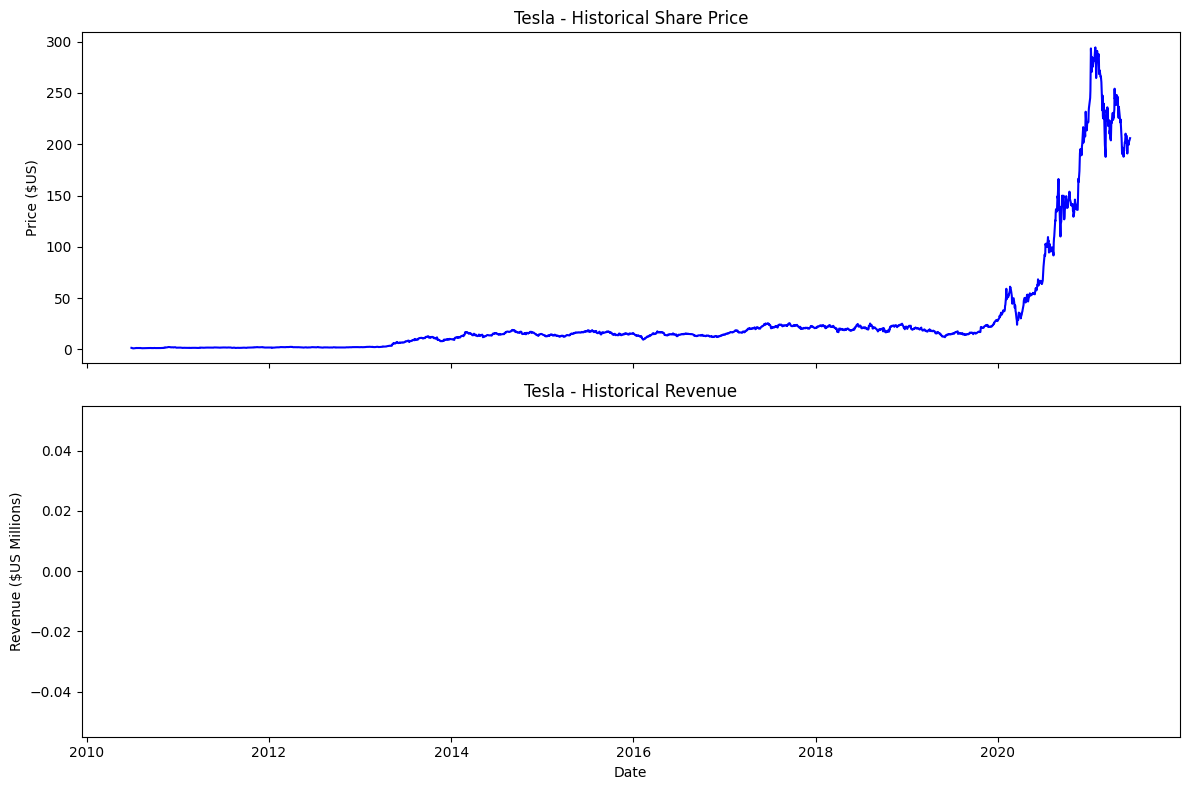

In [38]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [41]:
make_graph(gme_data, gme_revenue, 'GameStop')


NameError: name 'gme_revenue' is not defined